<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/denoising/blob/main/figs/averaging_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/vicente-gonzalez-ruiz/denoising/blob/main/figs/averae_denoising.ipynb)

# Denoising using stacking
By simulation, we check that the averaging of several instances of the same noisy signal (*stacking*) approximates to the clean signal. 1D and 2D cases are analyzed. Signal-independent and signal-dependent noise cases are considered.

Notation:

* $X=\text{clean signal.}$
* $N=\text{noise.}$
* $Y=\text{noisy signal.}$ In general, $Y=f(X,N).$

All simulations check that
\begin{equation}
  {\mathbb E}_I(Y)\approx X,
\end{equation}
for a large enough number $I$ of $Y$ instances.

<!-- We measure the performance of averaging considering that, theoretically, the SNR should increase with $\sqrt{I}$, where $I$ is the number of averaged noisy instances. Equivalently, averaging should reduce the noise variance by a factor of $I$, i.e.
\begin{equation}
\sigma^2_{\mathrm averaged}=\frac{\sigma^2_{\mathrm original}}{I},
\end{equation}
although this is not checked.-->

In [1]:
import math
from collections import namedtuple
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
try:
    import cv2
except:
    !pip install cv2
    import cv2
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io
try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})
#rc('text', usetex=True)
#rc('font', family='serif')
#plt.rc('text.latex', preamble=r'\usepackage{amsmath} `...')
#mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amsfonts}'

### Display Barb

In [2]:
Args = namedtuple("args", "input")
args = Args("http://www.hpca.ual.es/~vruiz/images/barb.png")

In [3]:
image = skimage_io.imread(args.input)  # Ground Truth
image.mean()

np.float64(112.4467544555664)

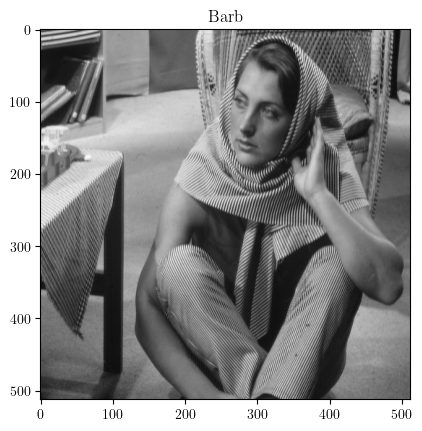

In [4]:
plt.title("Barb")
plt.imshow(image, cmap="gray")
#plt.show()
plt.savefig('barb.pdf', bbox_inches='tight')

In [5]:
#mean = np.mean(image)
#zero_mean_image = image.astype(np.float32) - mean
#print(np.mean(zero_mean_image))

In [6]:
min_PSNR = 60  # Minimum quality to stop averaging

## Zero-mean additive uniform (0MAU) noise
\begin{equation}
  Y = X + N,~N\sim{\mathcal U}(-c, c).
\end{equation}

### 1D

In [7]:
X = np.arange(101) - 50
X

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50])

In [8]:
X.mean()

np.float64(0.0)

In [9]:
N = np.random.uniform(low=-10, high=10, size=X.size)#.astype(np.int32)
N.mean()

np.float64(-0.4794182299844491)

In [10]:
Y = X + N

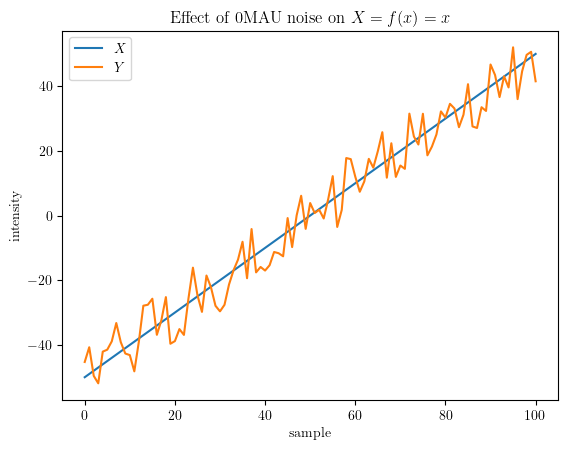

In [11]:
plt.title("Effect of 0MAU noise on $X=f(x)=x$")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [12]:
X = np.arange(101)
c = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    N = np.random.uniform(low=-c, high=c, size=len(X))
    Y = X + N
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

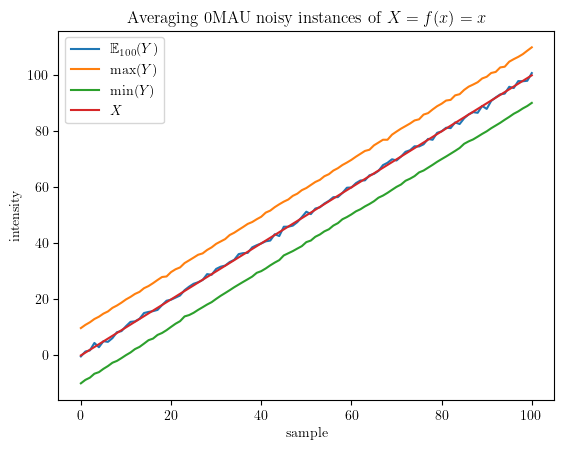

In [13]:
plt.title("Averaging 0MAU noisy instances of $X=f(x)=x$")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

### 2D

#### 0MAUN_barb

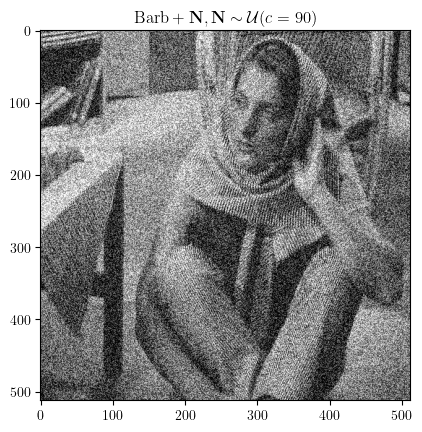

In [14]:
c = 90
plt.title(r"$\mathrm{Barb} + \mathbf{N}, \mathbf{N}\sim \mathcal{U}" + f"(c={c})$")
Y = image + np.random.uniform(low=-c, high=c, size=image.shape).reshape(image.shape)
Y = np.clip(a = Y, a_min=0, a_max=255)
plt.imshow(Y, cmap="gray")
plt.savefig('0MAUN_barb.pdf', bbox_inches='tight')

10 1 74.39606316168862

20 1 60.554878539679194

30 1 52.402305056501234
30 2 59.35477046322788
30 3 63.40087945336176

40 1 46.64159430406804
40 2 53.56524558871808
40 3 57.62427563695961
40 4 60.458548841854636

50 1 42.19689919499139
50 2 49.12400484012446
50 3 53.18151710569805
50 4 56.04800738720293
50 5 58.26761028315258
50 6 60.07503193793202

60 1 38.54367256114123
60 2 45.50899525331046
60 3 49.55922346691863
60 4 52.41157205030244
60 5 54.6472036407227
60 6 56.47399638432347
60 7 58.01323087471396
60 8 59.34721359187434
60 9 60.52143350227571

70 1 35.48061346803132
70 2 42.4030665248259
70 3 46.46218875233963
70 4 49.33838040031526
70 5 51.591277642584714
70 6 53.42504070449942
70 7 54.94314421401618
70 8 56.27518821301699
70 9 57.444951915231435
70 10 58.49537464038224
70 11 59.45218862448078
70 12 60.310608996597324

80 1 32.82053330179296
80 2 39.74449215036345
80 3 43.75776379216752
80 4 46.64404047998286
80 5 48.892769296328694
80 6 50.73513388376598
80 7 52.30310765385

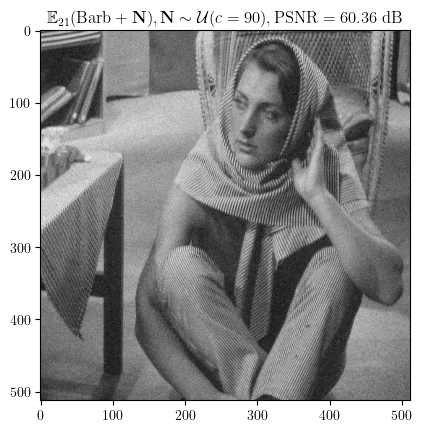

In [15]:
X = image
curves = []
for c in range(10, 100, 10):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        N = np.random.uniform(low=-c, high=c, size=image.shape).reshape(image.shape)
        Y = X.astype(np.float32) + N
        #plt.imshow(N, cmap="gray")
        #plt.show()
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised, X)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

print(iters)
plt.title(r"$\mathbb{E}_{\text{" + str(iters) + r"}}(\mathrm{Barb} + \mathbf{N}), \mathbf{N}\sim \mathcal{U}" + f"(c={c})," + r"\mathrm{PSNR}=" + f"{PSNR:.2f}" + r"~\mathrm{dB}$")
plt.imshow(denoised, cmap="gray")
plt.savefig('denoised_0MAUN_barb.pdf', bbox_inches='tight')

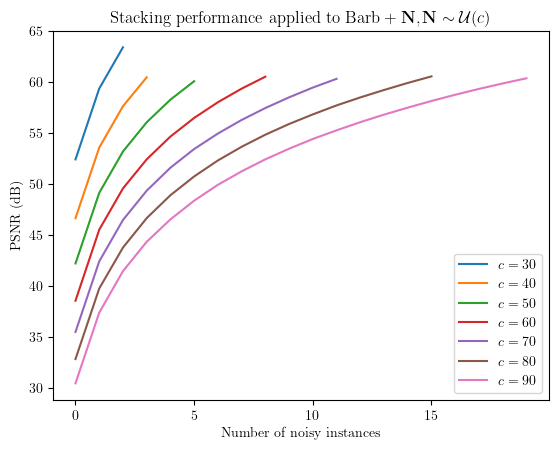

In [16]:
plt.title(r"Stacking performance applied to $\mathrm{Barb} + \mathbf{N}, \mathbf{N}\sim \mathcal{U}(c)$")
for i in range(len(curves)):
    if len(curves[i]) > 1:
        plt.plot(curves[i], label=rf"$c={(i+1)*10}$")
    #print(i)
#plt.plot([10*math.log(y+1)/math.log(10) for y in range(20)], label="$\sqrt{x}$")
plt.ylabel(r"PSNR ($\mathrm{dB}$)")
plt.xlabel(r"Number of noisy instances")
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
#plt.show()
plt.savefig("PSNR_0MAUN_barb.pdf", bbox_inches='tight')

### Quantization noise generated by a dead-zone uniform quantizer

In [17]:
X = np.arange(101) - 50
Y = (X/10).astype(np.int16) * 10

In [18]:
Y.mean()

np.float64(0.0)

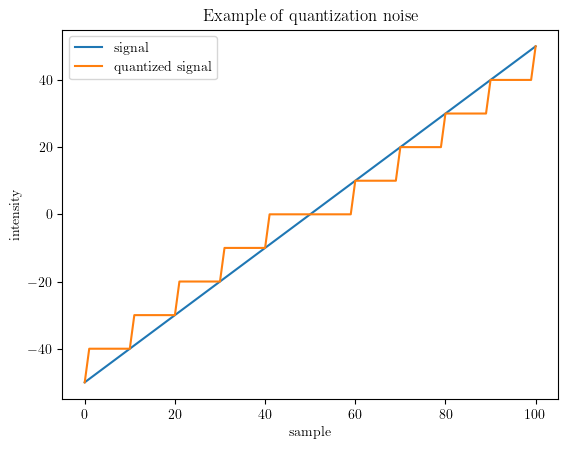

In [19]:
plt.title("Example of quantization noise")
plt.plot(X, label="signal")
plt.plot(Y, label="quantized signal")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

## Zero-mean multiplicative uniform (0MMU) noise
\begin{equation}
  Y = X (1 + N),~N\sim{\mathcal U}(-c, c).
\end{equation}

### 1D

In [20]:
X = np.arange(101) - 50

In [21]:
#N = np.random.uniform(low=-signal/10, high=signal/10)
N = np.random.uniform(low=-5, high=5, size=X.size)
N.mean()

np.float64(0.44571378340493073)

In [22]:
Y = X * (1 + N)

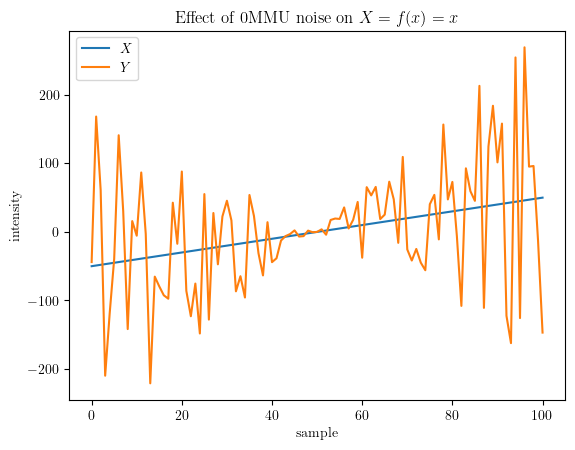

In [23]:
plt.title("Effect of 0MMU noise on $X=f(x)=x$")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [24]:
X = np.arange(101)
c = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    N = np.random.uniform(low=-c, high=c, size=len(X))
    Y = X * (1 + N)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

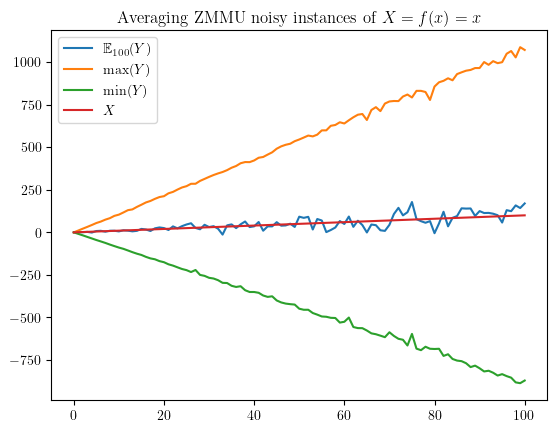

In [25]:
plt.title("Averaging ZMMU noisy instances of $X=f(x)=x$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

### 2D

In [26]:
X = image
curves = []
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noise = np.random.uniform(low=-2*zero_mean_image/c, high=2*zero_mean_image/c)
        N = np.random.uniform(low=-c/10, high=c/10, size=X.size).reshape(X.shape)
        Y = X.astype(np.float32) * (1 + N)
        #print(np.max(N), np.min(N))
        #Y = np.clip(a=Y, a_min=0, a_max=255).astype(np.uint8)
        #plt.imshow(N, cmap="gray")
        #plt.show()
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised, X)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

1 1 70.43924202685601

2 1 56.57428022587453
2 2 63.488401671643985

3 1 48.443486008668444
3 2 55.32405189115531
3 3 59.38167627508459
3 4 62.20990174242556

4 1 42.69701069471826
4 2 49.62947284131594
4 3 53.659380882438334
4 4 56.55851126483307
4 5 58.77359354801281
4 6 60.59627312210469

5 1 38.24209509347335
5 2 45.155442128217246
5 3 49.22153388070524
5 4 52.11083388865764
5 5 54.30598368238583
5 6 56.1173395096144
5 7 57.661474741978296
5 8 59.017218195191475
5 9 60.183015730740095

6 1 34.53381653295648
6 2 41.49007186886473
6 3 45.54872129477141
6 4 48.44100614075383
6 5 50.63953041720281
6 6 52.500103354951506
6 7 54.03486273098689
6 8 55.364664162368136
6 9 56.530368201709685
6 10 57.56304042048312
6 11 58.53299513025604
6 12 59.40310122745992
6 13 60.18524029217666

7 1 31.50488897069293
7 2 38.420313822826536
7 3 42.49026339159422
7 4 45.37904482259429
7 5 47.61742504243192
7 6 49.40448134217646
7 7 50.94750150165925
7 8 52.28641637591363
7 9 53.46606103380865
7 10 54.5105

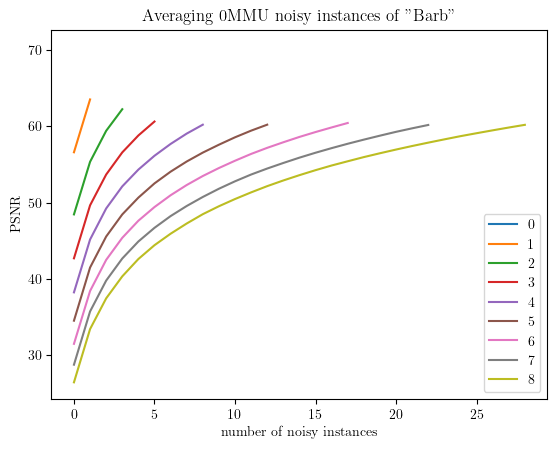

In [27]:
plt.title("Averaging 0MMU noisy instances of \"Barb\"")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.ylabel("PSNR")
plt.xlabel("number of noisy instances")
plt.legend()
plt.show()

## Zero-mean additive Gaussian (ZMAG) noise
\begin{equation}
  Y = X + N,~N\sim{\mathcal N}(\mu=0, \sigma).
\end{equation}

### 1D

In [28]:
X = np.arange(101) - 50
X.mean()

np.float64(0.0)

In [29]:
N = np.random.normal(loc=0, scale=10, size=X.size)
N.mean()

np.float64(0.04345236040089484)

In [30]:
Y = X + N

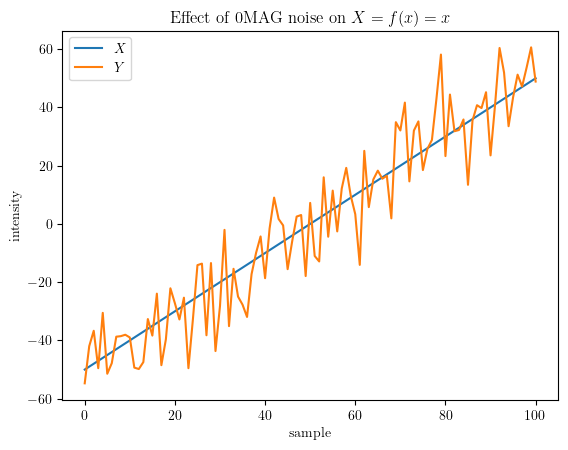

In [31]:
plt.title("Effect of 0MAG noise on $X=f(x)=x$")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [32]:
X = np.arange(101) - 50
sigma = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X) * 1000
for i in range(iters):
    N = np.random.normal(loc=0, scale=sigma, size=len(X))
    Y = X + N
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

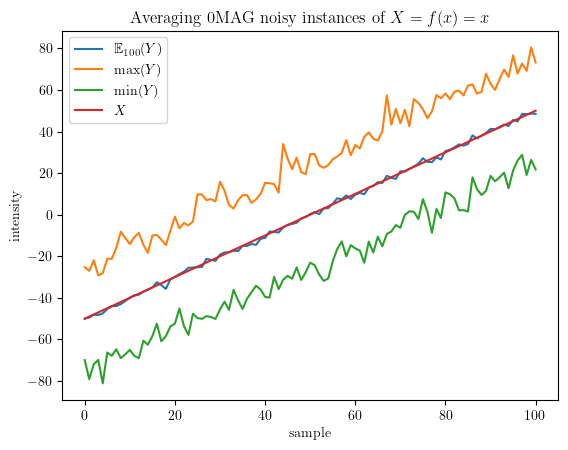

In [33]:
plt.title("Averaging 0MAG noisy instances of $X=f(x)=x$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

### 2D

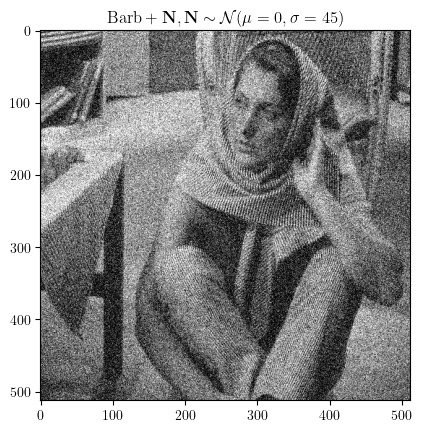

In [34]:
std_dev = 45
plt.title(r"$\mathrm{Barb} + \mathbf{N}, \mathbf{N}\sim \mathcal{N}" + rf"(\mu=0, \sigma={std_dev})$")
Y = image + np.random.normal(loc=0, scale=std_dev, size=image.shape).reshape(image.shape)
Y = np.clip(a = Y, a_min=0, a_max=255)
plt.imshow(Y, cmap="gray")
plt.savefig('0MAGN_barb.pdf', bbox_inches='tight')

10 1 63.36499768951751

15 1 55.32370673833316
15 2 62.2353988197366

20 1 49.64133248267446
20 2 56.6059775396503
20 3 60.66803669092251

25 1 45.283994637529815
25 2 52.21521694119332
25 3 56.29239449371162
25 4 59.136330276681726
25 5 61.36077011135783

30 1 41.76781848307915
30 2 48.63174099737387
30 3 52.70148215709889
30 4 55.58945827346918
30 5 57.80936842389106
30 6 59.63048647352921
30 7 61.167886437309036

35 1 38.82397496343515
35 2 45.7693532360486
35 3 49.80716391792767
35 4 52.64896304115557
35 5 54.882856454661535
35 6 56.72481543985271
35 7 58.23614288325044
35 8 59.547394699216724
35 9 60.69959352135412

40 1 36.33599358988373
40 2 43.21757339545998
40 3 47.2616290571965
40 4 50.153871594366436
40 5 52.3908973373934
40 6 54.21283631518708
40 7 55.72990608501005
40 8 57.031289727929575
40 9 58.183838414098716
40 10 59.234851974135225
40 11 60.1848220976143

45 1 34.19019007621036
45 2 41.12450647258378
45 3 45.17062745471368
45 4 48.0407001365019
45 5 50.24199694593377


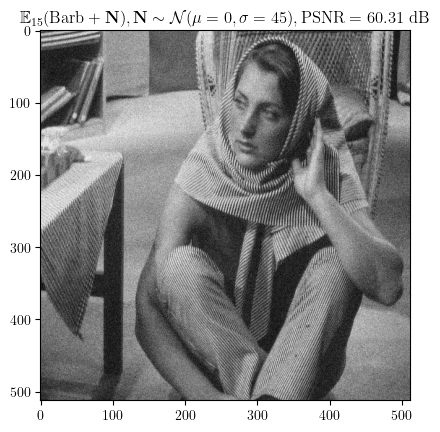

In [35]:
X = image
curves = []
#sigma_index = 1
for std_dev in range(10, 50, 5):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        N = np.random.normal(loc=0, scale=std_dev, size=X.shape).reshape(X.shape)
        Y = X.astype(np.float32) + N
        Y = np.clip(a=Y, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised, X)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()
plt.title(r"$\mathbb{E}_{\text{" + str(iters) + r"}}(\mathrm{Barb} + \mathbf{N}), \mathbf{N}\sim \mathcal{N}" + rf"(\mu=0, \sigma={std_dev})," + r"\mathrm{PSNR}=" + f"{PSNR:.2f}" + r"~\mathrm{dB}$")
plt.imshow(denoised, cmap="gray")
plt.savefig('denoised_0MAGN_barb.pdf', bbox_inches='tight')

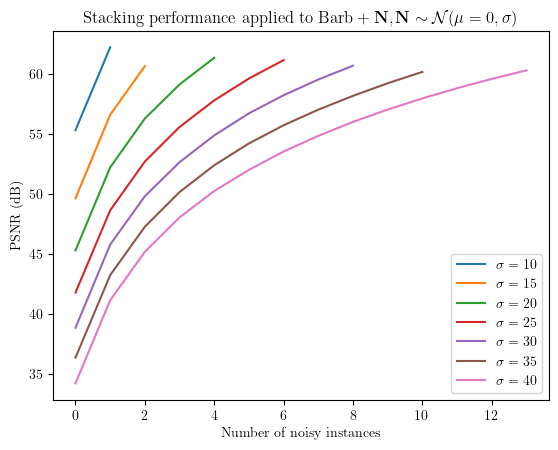

In [36]:
plt.title(r"Stacking performance applied to $\mathrm{Barb} + \mathbf{N}, \mathbf{N}\sim \mathcal{N}(\mu=0, \sigma)$")
for i in range(len(curves)):
    if len(curves[i]) > 1:
        plt.plot(curves[i], label=rf"$\sigma={(i+1)*5}$")
    #print(i)
plt.ylabel(r"PSNR ($\mathrm{dB}$)")
plt.xlabel(r"Number of noisy instances")
plt.legend()
#plt.show()
plt.savefig("PSNR_0MAGN_barb.pdf", bbox_inches='tight')

## Zero-mean multiplicative Gaussian (0MMG) noise (speckle noise)
\begin{equation}
  Y = X (1 + N),~N\sim{\mathcal N}(\mu=0, \sigma).
\end{equation}

### 1D

In [37]:
X = np.arange(101) - 50

In [38]:
N = np.random.normal(loc=0, scale=1, size=X.size)
N.mean()

np.float64(0.01925147080537049)

In [39]:
Y = X * (1 + N)

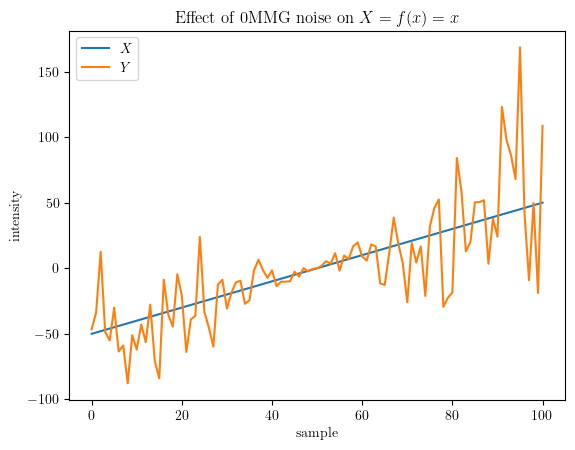

In [40]:
plt.title("Effect of 0MMG noise on $X=f(x)=x$")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [41]:
X = np.arange(101)
c = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    N = np.random.normal(loc=0, scale=X)
    Y = X * (1 + N)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

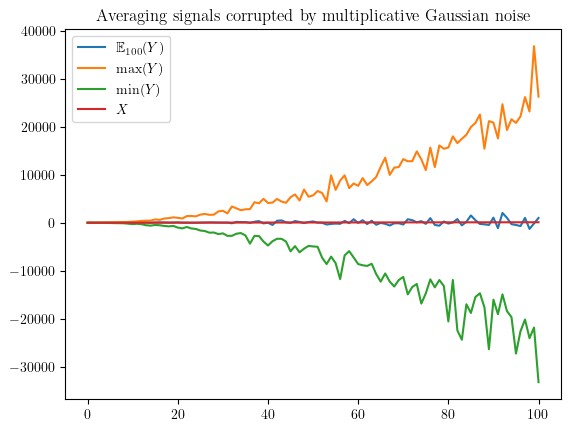

In [42]:
plt.title("Averaging signals corrupted by multiplicative Gaussian noise")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

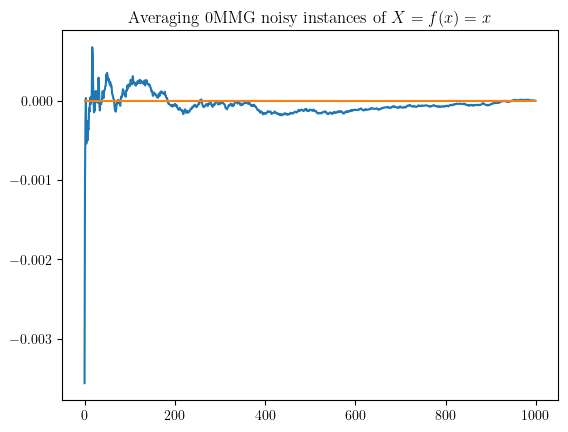

In [43]:
signal = np.ones(100000)
acc_means = 0.0
l = []
for i in range(1000):
    N = np.random.normal(loc=0, scale=signal)
    mean_N = np.mean(N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)

plt.title("Averaging 0MMG noisy instances of $X=f(x)=x$")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

### 2D

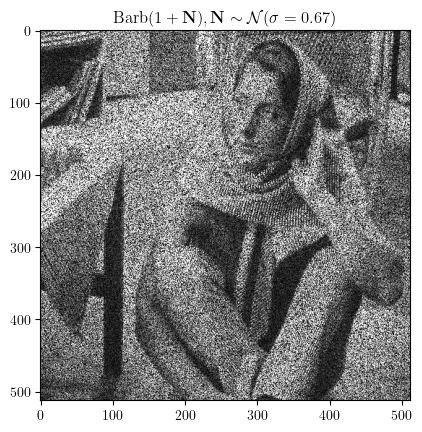

In [44]:
std_dev = 10/15
plt.title(r"$\mathrm{Barb} (1 + \mathbf{N}), \mathbf{N}\sim \mathcal{N}" + rf"(\sigma={std_dev:.2f})$")
Y = image * (1 + np.random.normal(loc=0, scale=std_dev, size=image.shape).reshape(image.shape))
Y = np.clip(a = Y, a_min=0, a_max=255)
plt.imshow(Y, cmap="gray")
plt.savefig('0MMGN_barb.pdf', bbox_inches='tight')

0.06666666666666667 1 67.51621589760066

0.13333333333333333 1 53.76005122464227
0.13333333333333333 2 60.67809277222209

0.2 1 45.83945925759173
0.2 2 52.736606054918596
0.2 3 56.68297794903537
0.2 4 59.54933828007466
0.2 5 61.77217227659166

0.26666666666666666 1 40.37472350398809
0.26666666666666666 2 47.30572880626568
0.26666666666666666 3 51.318860501981305
0.26666666666666666 4 54.132373691356065
0.26666666666666666 5 56.34029464398602
0.26666666666666666 6 58.12978462405434
0.26666666666666666 7 59.65015569960664
0.26666666666666666 8 60.921335592698924

0.3333333333333333 1 36.32432346249403
0.3333333333333333 2 43.18101412325191
0.3333333333333333 3 47.16431802708929
0.3333333333333333 4 49.99294921798058
0.3333333333333333 5 52.18438003662604
0.3333333333333333 6 53.969434883885945
0.3333333333333333 7 55.46432104799042
0.3333333333333333 8 56.71215558225391
0.3333333333333333 9 57.817965744289964
0.3333333333333333 10 58.852369010182066
0.3333333333333333 11 59.7572025516720

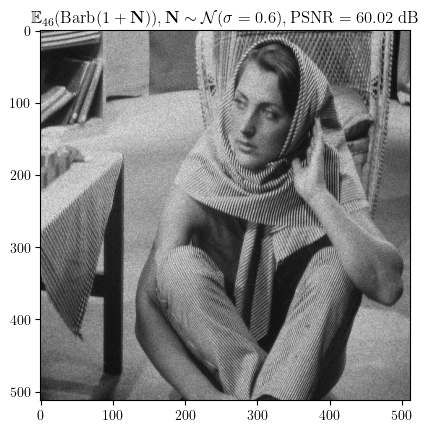

In [45]:
X = image
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        N = np.random.normal(loc=0, scale=std_dev/15, size=X.shape).reshape(X.shape)
        Y = X.astype(np.float32) * (1 + N)
        Y = np.clip(a=Y, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), X)
        print(std_dev/15, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

plt.title(r"$\mathbb{E}_{\text{" + str(iters) + r"}}(\mathrm{Barb} (1 + \mathbf{N})), \mathbf{N}\sim \mathcal{N}" + rf"(\sigma={std_dev/15})," + r"\mathrm{PSNR}=" + f"{PSNR:.2f}" + r"~\mathrm{dB}$")
plt.imshow(denoised, cmap="gray")
plt.savefig('denoised_0MMGN_barb.pdf', bbox_inches='tight')

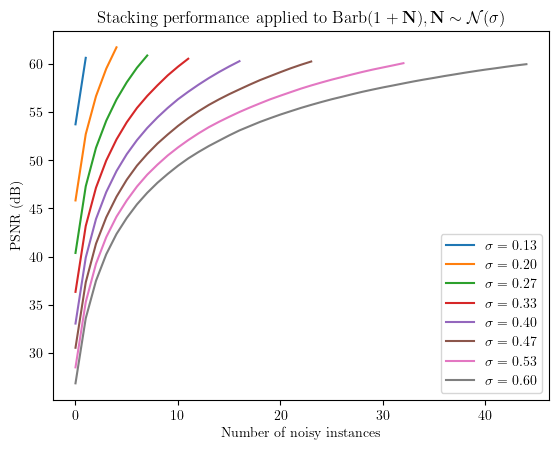

In [46]:
plt.title(r"Stacking performance applied to $\mathrm{Barb}(1 + \mathbf{N}), \mathbf{N}\sim \mathcal{N}(\sigma)$")
for i in range(len(curves)):
    if len(curves[i]) > 1:
        plt.plot(curves[i], label=rf"$\sigma={(i+1)/15:.2f}$")
    #print(i)
plt.ylabel(r"PSNR ($\mathrm{dB}$)")
plt.xlabel(r"Number of noisy instances")
plt.legend()
#plt.show()
plt.savefig("PSNR_0MMGN_barb.pdf", bbox_inches='tight')

## Poisson noise (shot noise)
\begin{equation}
  Y=\frac{N}{\lambda},~N∼\text{Poisson}(λ=\lambda X),
\end{equation}
where:
* $X\ge 0$.
* $\lambda\in{\mathbb R}\ge 0$ is the rate of the Poisson distribution (resulting that $\lambda={\mathbb E}(N)=\text{Var}(N)$.

### 1D

In [47]:
X = np.arange(101)
X.mean()

np.float64(50.0)

In [48]:
_lambda = 0.3
Y = np.random.poisson(X * _lambda) /  _lambda
print(np.mean(Y))

51.91419141914193


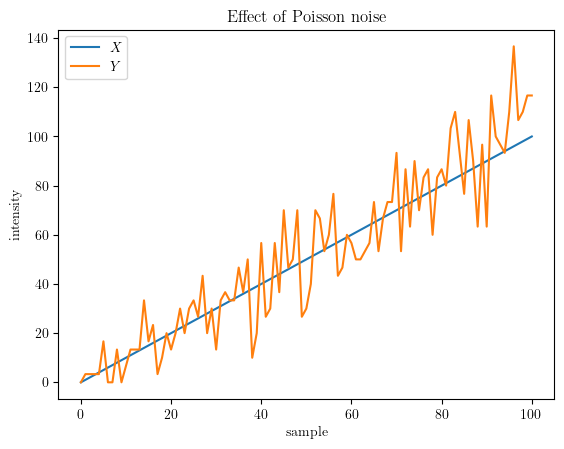

In [49]:
plt.title("Effect of Poisson noise")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [50]:
X = np.arange(101)
_lambda = 1
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    Y = np.random.poisson(X * _lambda) /  _lambda
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

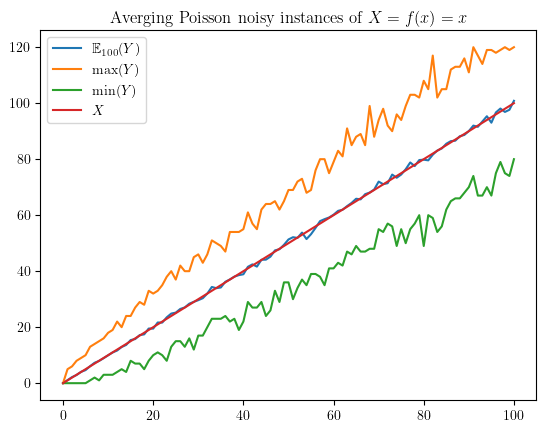

In [51]:
plt.title("Averging Poisson noisy instances of $X=f(x)=x$")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

### 2D

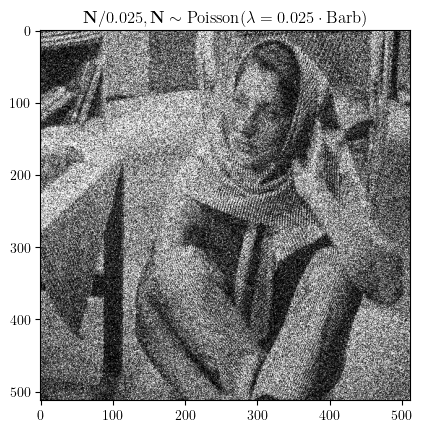

In [52]:
_lambda = 1/40
plt.title(r"$\mathbf{N}" + rf"/{_lambda}" + r", \mathbf{N}\sim\mathrm{Poisson}" + rf"(\lambda={_lambda}" + r"\cdot\mathrm{Barb})$")
Y = np.random.poisson(image.astype(np.float32) * _lambda) / _lambda
Y = np.clip(a = Y, a_min=0, a_max=255)
plt.imshow(Y, cmap="gray")
plt.savefig('Poisson_barb.pdf', bbox_inches='tight')

a 324.0 0.0 112.53366088867188
0.25 1 48.43051490064093 255.0 0.0
a 320.0 0.0 112.47190856933594
0.25 2 55.352605290594425 255.0 4.0
a 356.0 0.0 112.39862060546875
0.25 3 59.43544306895664 255.0 8.0
a 328.0 0.0 112.49534606933594
0.25 4 62.33387952952691 255.0 11.0

a 328.88888888888886 0.0 112.4305894639757
0.225 1 47.398893006917795 255.0 0.0
a 328.88888888888886 0.0 112.41327921549477
0.225 2 54.33005866844888 255.0 4.0
a 351.1111111111111 0.0 112.36353556315106
0.225 3 58.3596645246824 255.0 6.666666666666667
a 342.22222222222223 0.0 112.44484795464412
0.225 4 61.19865230128446 255.0 10.5

a 335.0 0.0 112.47900009155273
0.2 1 46.26895704388335 255.0 0.0
a 365.0 0.0 112.39208221435547
0.2 2 53.15874688892241 255.0 2.5
a 330.0 0.0 112.46273040771484
0.2 3 57.1909948567897 255.0 6.666666666666667
a 340.0 0.0 112.37499237060547
0.2 4 60.05806404456941 255.0 6.25

a 377.14285714285717 0.0 112.48271397181924
0.175 1 44.92827083298092 255.0 0.0
a 354.28571428571433 0.0 112.37522670200893


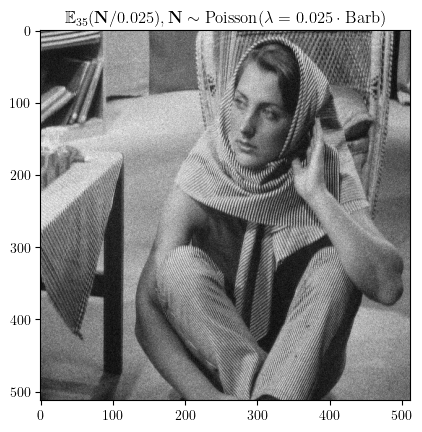

In [53]:
X = image
curves = []
#print(X.max(), X.min(), X.mean())
for _lambda in range(10, 0, -1):
    _lambda /= 40
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #Y = np.random.poisson((X.astype(np.float32) + 1) * _lambda)
        #Y = Y - _lambda
        Y = np.random.poisson(X.astype(np.float32) * _lambda) / _lambda
        #Y = Y - _lambda
        #Y = Y / _lambda
        print('a', np.max(Y), np.min(Y), np.mean(Y))
        Y = np.clip(a = Y, a_min=0, a_max=255)
        Y = Y.astype(np.uint8)
        #print('b', np.max(Y), np.min(Y))
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), X)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

plt.title(r"$\mathbb{E}_{\text{" + str(iters) + r"}}(\mathbf{N}" + rf"/{_lambda}" + r"), \mathbf{N}\sim\mathrm{Poisson}" + rf"(\lambda={_lambda}" + r"\cdot\mathrm{Barb})$")
plt.imshow(denoised, cmap="gray")
plt.savefig('denoised_Poisson_barb.pdf', bbox_inches='tight')

10
9
8
7
6
5
4
3
2
1


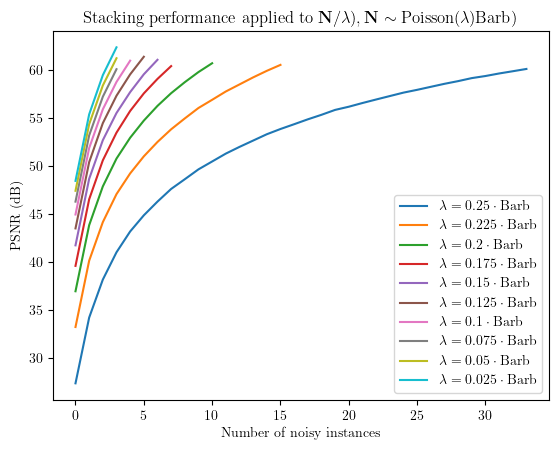

In [54]:
plt.title(r"Stacking performance applied to " + r"$\mathbf{N}" + r"/\lambda" + r"), \mathbf{N}\sim\mathrm{Poisson}" + rf"(\lambda)" + r"\mathrm{Barb})$")
#plt.title(r"$\mathbb{E}_{\text{" + str(iters) + r"}}(\mathbf{N}" + rf"/{_lambda}" + r"), \mathbf{N}\sim\mathrm{Poisson}" + rf"(\lambda={_lambda}" + r"\mathrm{Barb})$")
#plt.title("Averaging Poisson noisy instances of \"Barb\"")
for i in range(10, 0, -1):
    print(i)
    if len(curves[i-1]) > 1:
        plt.plot(curves[i-1], label=rf"$\lambda={i/40}" + r"\cdot\mathrm{Barb}$")
plt.ylabel(r"PSNR ($\mathrm{dB}$)")
plt.xlabel(r"Number of noisy instances")
plt.legend()
#plt.show()
plt.savefig("PSNR_Poisson_barb.pdf", bbox_inches='tight')

## Rician noise (speckle noise)
\begin{equation}
  Y = \sqrt{(X + N_1)^2 + (N_2)^2}, Y\sim\text{Rice}(\nu,\sigma)
\end{equation}
where:
* $\nu\ge 0$ is the noncentrality parameter (representing the distance from the origin in the 2D Gaussian space),
* $\sigma$ is the scale parameter (representing the standard deviation of the underlying Gaussian components),
* and $N_1$ and $N_2$ are independent Gaussian noise components with zero mean and standard deviation $\sigma$.

We have that
\begin{equation}
  \mathbb{E}(R) = \sigma \sqrt{\pi/2}\,\,L_{1/2}(-\nu^2/2\sigma^2),
\end{equation}
where $L_{1/2}$ is the modified Laguerre function of order 1/2, which implies that the reconstructed signal by averaging will be biased. For this reason, under the assumption that $\sigma$ is knwon (or estimated), we can correct the averaged signal doing
\begin{equation}
  Y_\text{unbiased} = \sqrt{Y^2 - 2\sigma^2}, \quad \text{if} ~ Y^2 > 2\sigma^2.
\end{equation}

In [55]:
def add_rician_noise(X, sigma):
    """
    Add Rician noise to X.

    Parameters:
    - X: signal.
    - sigma: Standard deviation of the Gaussian noise components (controls noise strength).

    Returns:
    - Noisy signal corrupted with Rician noise.
    """
    # Generate two independent Gaussian noise components
    N1 = np.random.normal(0, sigma, X.shape)
    N2 = np.random.normal(0, sigma, X.shape)

    # Apply the Rician noise model
    Y = np.sqrt((X + N1)**2 + N2**2)

    return Y

### 1D

In [56]:
X = np.arange(101)
X.mean()

np.float64(50.0)

In [57]:
max_intensity = np.max(X)
min_intensity = np.min(X)
dynamic_range = max_intensity - min_intensity
normalized_X = (X - min_intensity) / dynamic_range

In [58]:
sigma = 8
normalized_Y = add_rician_noise(normalized_X, sigma/100)
Y = dynamic_range * normalized_Y + min_intensity
Y.mean()

np.float64(50.75177067032034)

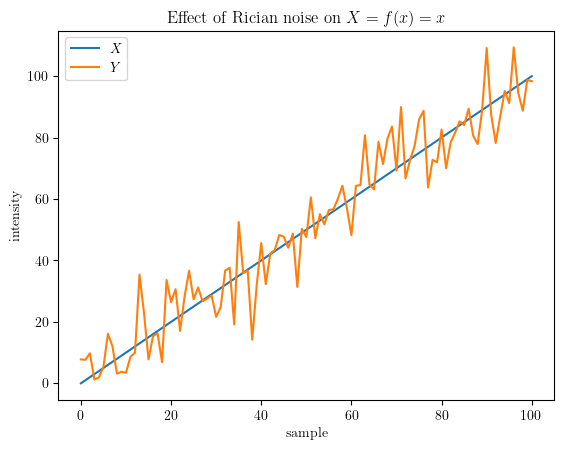

In [59]:
plt.title("Effect of Rician noise on $X=f(x)=x$")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [60]:
X = np.arange(101)
sigma = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    Y = add_rician_noise(X, sigma)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

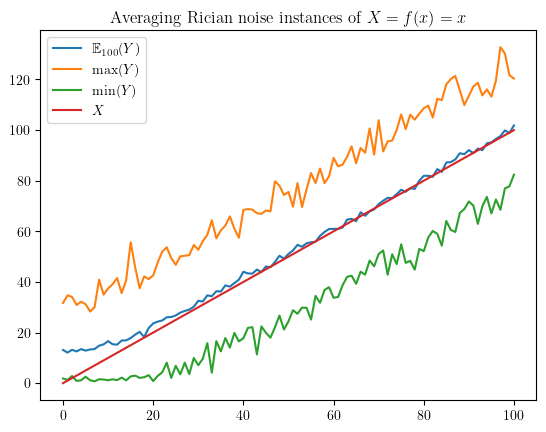

In [61]:
plt.title("Averaging Rician noise instances of $X=f(x)=x$")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

In [62]:
def correct_rician_bias(Y, sigma):
    """
    Correct the bias introduced by Rician noise in Y.

    Parameters:
        Y (numpy.ndarray): The noisy signal corrupted by Rician noise.
        sigma (float): The standard deviation of the Gaussian noise.

    Returns:
        numpy.ndarray: The bias-corrected signal.
    """
    # Compute the squared correction term (2 * sigma^2)
    correction_term = 2 * sigma**2

    # Correct the bias. Notice that if Y^2 < 2*sogma^2, the noise
    # dominates and we suppose that Y = 0.
    unbiased_Y = np.sqrt(np.maximum(Y**2 - correction_term, 0))

    return unbiased_Y

In [63]:
# Correct the bias after all the iterations
average_Y = correct_rician_bias(average_Y, sigma)

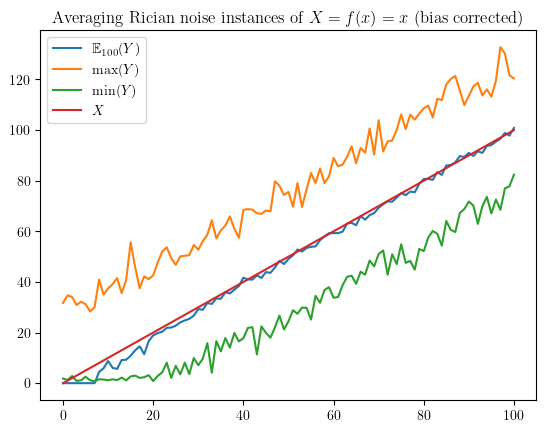

In [64]:
plt.title("Averaging Rician noise instances of $X=f(x)=x$ (bias corrected)")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

In [65]:
# Correct the bias at each iteration
X = np.arange(101)
sigma = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    Y = add_rician_noise(X, sigma)
    Y = correct_rician_bias(Y, sigma)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

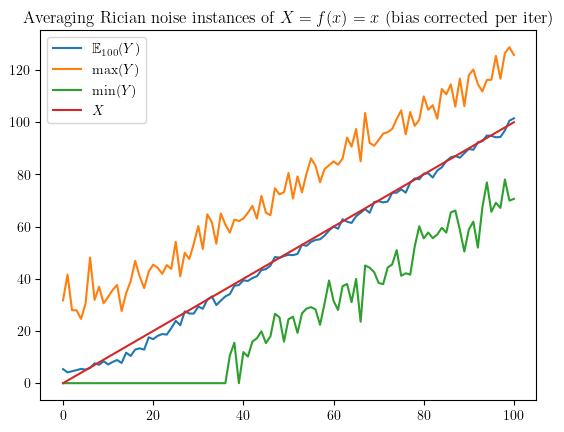

In [66]:
plt.title("Averaging Rician noise instances of $X=f(x)=x$ (bias corrected per iter)")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

### 2D

In [67]:
X = image
curves = []
#print(X.max(), X.min(), X.mean())
for sigma in range(15, 50, 5):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        Y = add_rician_noise(X, sigma)
        Y = correct_rician_bias(Y, sigma)
        #print('a', np.max(Y), np.min(Y), np.mean(Y))
        #Y = np.clip(a = Y, a_min=0, a_max=255)
        #Y = Y.astype(np.uint8)
        #print('b', np.max(Y), np.min(Y))
        acc_denoised += Y
        denoised = acc_denoised/iters
        #PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), X)
        PSNR = IT.distortion.PSNR(denoised, X)
        print(sigma, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

15 1 54.42461477007106 268.1896865376231 0.0
15 2 61.22082276150431 257.763062277994 0.0

20 1 48.32165145023553 307.53328391242695 0.0
20 2 55.04273608584175 265.12423501782223 0.0
20 3 58.90739052079308 260.8534661940869 0.0
20 4 61.55495444658463 257.99206658902347 0.0

25 1 43.546376402073086 302.22265535668976 0.0
25 2 50.25695863360957 273.22001814945736 0.0
25 3 54.03698905344072 274.96324640781717 0.0
25 4 56.6659961691724 260.81381843416574 0.0
25 5 58.66849409929904 256.8098812709186 0.0
25 6 60.25430106327602 255.22031690694806 0.0

30 1 39.606291170321306 318.695757817636 0.0
30 2 46.274824846682804 294.2134982844918 0.0
30 3 50.03286864932059 278.9159124840126 0.0
30 4 52.605510126881335 274.89946481276144 0.0
30 5 54.57730144316593 276.83370044437027 0.0
30 6 56.11676905364475 270.04490636002316 0.0
30 7 57.39245507383694 263.6971637651996 0.0
30 8 58.46229213877963 262.69867098098086 0.0
30 9 59.37862591469505 262.57775222820896 0.0
30 10 60.165447180607885 258.576199847

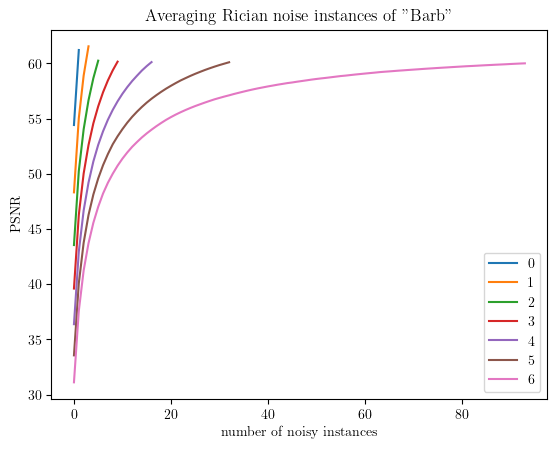

In [68]:
plt.title("Averaging Rician noise instances of \"Barb\"")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.ylabel("PSNR")
plt.xlabel("number of noisy instances")
plt.legend()
plt.show()

In [ ]:
input()

# -------- Ignore the rest ---------

In [ ]:
acc_means = 0.0
l = []
for i in range(1000):
    #N = np.random.uniform(low=-10, high=10, size=X.size)
    N = np.random.uniform(low=-1, high=1, size=100000)
    #print(N[0])
    mean_N = np.mean(N)
    #print(mean_N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)
    #print(i, average_means)

plt.title("Average of means for zero-mean aditive uniform noise")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

In [ ]:
signal = np.ones(100000)
acc_means = 0.0
l = []
for i in range(1000):
    N = np.random.uniform(low=-signal, high=signal)
    mean_N = np.mean(N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)

plt.title("Average of means for zero-mean multiplicative uniform noise")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

## Signal-dependent additive uniform noise

### 1D

In [ ]:
signal = np.arange(101) - 50

In [ ]:
noise = np.random.uniform(low=-signal, high=signal)
noise.mean()

In [ ]:
noisy = signal + noise

In [ ]:
plt.title("signal-dependent additive uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

### 2D

In [ ]:
mean = np.mean(image)
zero_mean_image = image.astype(np.float32) - mean
print(np.mean(zero_mean_image))

In [ ]:
curves = []
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(low=-2*zero_mean_image/c, high=2*zero_mean_image/c)
        noisy = image + noise
        #print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
plt.title("signal-dependent additive uniform noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

In [ ]:
x = np.arange(10)
print(np.random.normal(x, scale=1.0))
print(np.random.poisson(x))

In [ ]:
curves = []
#sigma_index = 1
max_intensity = np.max(image)
min_intensity = np.min(image)
dynamic_range = max_intensity - min_intensity
normalized_image = (image - min_intensity) / dynamic_range
#print("image", np.max(image), np.min(image))
#print(normalized_image.dtype)
for std_dev in range(10, 100, 10):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_image*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        #noisy = dynamic_range * np.random.normal(normalized_image*std_dev)/std_dev + min_intensity
        noisy = np.random.normal(loc=image, scale=std_dev)
        print('a', np.max(noisy), np.min(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #print()

In [ ]:
curves = []
mean = 0
#sigma_index = 1
for std_dev in range(10, 40, 4):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(mean, std_dev, image.shape).reshape(image.shape)
        print(np.max(noise), np.min(noise))
        #noisy = np.clip(a=image.astype(np.float32) + (1 + noise), a_min=0, a_max=255).astype(np.uint8)
        noisy = dynamic_range * np.random.normal(normalized_image*_lambda)/_lambda + min_intensity
        #noisy = image.astype(np.float32) * (1+noise)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        plt.imshow(np.clip(denoised, 0, 255).astype(np.uint8), cmap="gray")
        plt.show()
        input()

    curves.append(curve)
    #sigma_index += 1
    #print()

In [ ]:
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

## Signal-dependent additive Gaussian noise

### 1D

In [ ]:
signal = np.arange(101) - 50

In [ ]:
noise = np.random.normal(loc=0, scale=np.abs(signal))
noise.mean()

In [ ]:
noisy = signal + noise

In [ ]:
plt.title("signal-dependent additive Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

### 2D

In [ ]:
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=image/std_dev/2)
        noisy = image + noise
        #print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

In [ ]:
plt.title("signal-dependent additive Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

## Using signal-independent multiplicative uniform noise

In [ ]:
noise = np.random.uniform(low=-5, high=5, size=signal.size).astype(np.int32)
noisy = signal * (1 + noise/5)
#noisy = np.random.uniform(low=-signal/2, high=signal/2) + signal
#noisy = np.random.uniform(low=-signal/2, high=signal/2)

In [ ]:
plt.title("signal-independent multiplicative uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
#plt.plot(signal, noisy2, label="noisy2")
plt.legend()
plt.show()

In [ ]:
curves = []
#sigma_index = 1
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(-c/10, c/10, image.shape).reshape(image.shape)
        #print(np.max(noise), np.min(noise))
        noisy = np.clip(a=image.astype(np.float32) * (1 + noise), a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #print()

In [ ]:
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-dependent multiplicative Gaussian noise

In [ ]:
noise = np.random.normal(loc=0, scale=np.abs(signal))
noisy = signal + (1 + noise)

In [ ]:
plt.title("signal-dependent multiplicative Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [ ]:
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=image/(std_dev*300))
        noisy = image * (1 + noise)
        print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

In [ ]:
plt.title("signal-dependent multiplicative Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Versión antigua Poisson noise

In [ ]:
_lambda = 1
#noisy = np.random.poisson(lam=(normalized_signal*_lambda))
#noisy = normalized_signal * (1 + np.random.poisson(_lambda, len(signal)))
#noisy = dynamic_range * noisy/_lambda + min_intensity
#Y = np.random.poisson((X + 1) * _lambda)
#Y = Y - _lambda
Y = np.random.poisson(X * _lambda)
#noisy = dynamic_range * noisy/_lambda + min_intensity
#noisy = signal + noisy / mean
#Y -= _lambda
Y = Y / _lambda
print(np.mean(Y))

In [ ]:
# Versión antigua Poisson noise
curves = []
#sigma_index = 1
max_intensity = np.max(image)
min_intensity = np.min(image)
dynamic_range = max_intensity - min_intensity
normalized_image = (image - min_intensity) / dynamic_range
print("image", np.max(image), np.min(image), np.mean(image))
#print(normalized_image.dtype)
#for _lambda in range(20, 200, 20):
for _lambda in range(2, 20, 2):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_image*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        noisy = np.random.poisson(lam=normalized_image*_lambda) # noisy[i]~Poisson(normalized_image[i]*_lambda)~
        #noisy = normalized_image * (1 + np.random.poisson(lam=_lambda, size=image.shape))
        noisy = dynamic_range * noisy/_lambda + min_intensity
        #noisy = dynamic_range * np.random.normal(normalized_image*_lambda)/_lambda + min_intensity
        print('a', np.max(noisy), np.min(noisy), np.mean(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
### Poisson noise
max_intensity = np.max(signal)
min_intensity = np.min(signal)
dynamic_range = max_intensity - min_intensity
normalized_signal = (signal - min_intensity) / dynamic_range
mean = _lambda = 60
#noisy = np.random.poisson(lam=(normalized_signal*_lambda))
#noisy = normalized_signal * (1 + np.random.poisson(_lambda, len(signal)))
#noisy = dynamic_range * noisy/_lambda + min_intensity
noisy = np.random.poisson(normalized_signal*_lambda)
noisy = noisy - _lambda/2
noisy = dynamic_range * noisy/_lambda + min_intensity
noisy = signal + noisy / mean
print(np.mean(noisy))

In [ ]:
signal = np.arange(100000)
_lambda = 0.0001
acc_means = 0.0
l = []
for i in range(1000):
    N = np.random.poisson(signal*_lambda)
    N = N - _lambda
    mean_N = np.mean(N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)

plt.title("Average of means for zero-mean Poisson noise")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

## Version antigua Rician noise

In [ ]:
curves = []
#sigma_index = 1
max_intensity = np.max(image)
min_intensity = np.min(image)
dynamic_range = max_intensity - min_intensity
normalized_image = (image - min_intensity) / dynamic_range
print("image", np.max(image), np.min(image), np.mean(image))
#print(normalized_image.dtype)
#for _lambda in range(20, 200, 20):
for sigma in range(7, 17, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_image*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        #noisy = np.random.poisson(normalized_image*_lambda) # noisy[i]~Poisson(normalized_image[i]*_lambda)~
        noisy = add_rician_noise(normalized_image, sigma/100)
        noisy = dynamic_range * noisy + min_intensity
        #noisy = dynamic_range * np.random.normal(normalized_image*_lambda)/_lambda + min_intensity
        print('a', np.max(noisy), np.min(noisy), np.mean(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        plt.imshow(denoised, cmap="gray")
        plt.show()
        input()

    curves.append(curve)
    print()

In [ ]:
mean = 0
var = 1000
std_dev = 30
noise = np.random.normal(mean, std_dev, image.shape).reshape(image.shape)
noisy = np.clip(a=image.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
IT.distortion.PSNR(noisy, image)

In [ ]:
IT.

In [ ]:
np.max(noisy)

In [ ]:
np.min(noisy)

In [ ]:
plt.imshow(noisy, cmap="gray")

In [ ]:
denoised = cv2.fastNlMeansDenoising(noisy, None, h=33, templateWindowSize=7, searchWindowSize=9)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 32))
axs[0].imshow(noisy, cmap="gray")
axs[0].set_title(f"Noisy")
axs[1].imshow(denoised, cmap="gray")
axs[1].set_title(f"Denoised (DQI={information_theory.information.compute_quality_index(noisy, denoised)})")
fig.tight_layout()
plt.show()

In [ ]:
np.mean(noisy)

In [ ]:
np.mean(denoised)

In [ ]:
denoised = image

In [ ]:
denoised.dtype

In [ ]:
from skimage.metrics import structural_similarity as ssim
from scipy import stats

In [ ]:
diff = (noisy - denoised).astype(np.uint8)

In [ ]:
plt.imshow(diff, cmap="gray")

In [ ]:
_, N = ssim(noisy, diff, full=True)

In [ ]:
plt.imshow(N, cmap="gray")

In [ ]:
_, P = ssim(noisy, denoised.astype(np.uint8), full=True)

In [ ]:
plt.imshow(P, cmap="gray")

In [ ]:
quality, _ = stats.pearsonr(N.flatten(), P.flatten())

In [ ]:
quality

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image + noise
    return noisy_image

# Function to add Gaussian noise in the Fourier domain
def add_gaussian_noise_fourier(image, sigma):
    # Compute the Fourier transform of the image
    image_fft = fft2(image)
    # Generate Gaussian noise in the frequency domain
    noise_fft = np.random.normal(0, sigma, image_fft.shape) + 1j * np.random.normal(0, sigma, image_fft.shape)
    noisy_image_fft = image_fft + noise_fft
    # Transform back to the spatial domain
    noisy_image = np.abs(ifft2(noisy_image_fft))
    return noisy_image

# Load a sample grayscale image (e.g., from matplotlib's sample data)
from skimage import data
image = data.camera() / 255.0  # Normalize the image to [0, 1]

# Add Gaussian noise in spatial and Fourier domains
sigma = 0.5  # Standard deviation of the Gaussian noise
noisy_image_spatial = add_gaussian_noise(image, sigma)
noisy_image_fourier = add_gaussian_noise_fourier(image, sigma*500)

# Display the original and noisy images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(noisy_image_spatial, cmap='gray')
axs[1].set_title('Noisy Image (Spatial Domain)')
axs[1].axis('off')

axs[2].imshow(noisy_image_fourier, cmap='gray')
axs[2].set_title('Noisy Image (Fourier Domain)')
axs[2].axis('off')

plt.tight_layout()
plt.show()
